In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
ls /mnt/efs/data/ecco_section_transports_fw_Sref*

/mnt/efs/data/ecco_section_transports_fw_Sref300.nc
/mnt/efs/data/ecco_section_transports_fw_Sref348.nc
/mnt/efs/data/ecco_section_transports_fw_Sref349.nc
/mnt/efs/data/ecco_section_transports_fw_Sref351.nc
/mnt/efs/data/ecco_section_transports_fw_Sref352.nc


In [3]:
flx = xr.open_dataset('/mnt/efs/data/ecco_section_transports_fw.nc')
nc = xr.open_dataset('/mnt/efs/data/ecco_section_transports_fw_Sref348.nc')
#nc = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_fw_eulerian.nc')

In [4]:
flx = flx.rename({'fw':'fw_sref350'})
flx['fw_sref348'] = nc.rename({'fw':'fw_sref348'})['fw_sref348']

In [5]:
nc = xr.open_dataset('/mnt/efs/data/ecco_section_transports_fw_Sref349.nc')
flx['fw_sref349'] = nc.rename({'fw':'fw_sref349'})['fw_sref349']

In [6]:
nc = xr.open_dataset('/mnt/efs/data/ecco_section_transports_fw_Sref351.nc')
flx['fw_sref351'] = nc.rename({'fw':'fw_sref351'})['fw_sref351']

In [7]:
nc = xr.open_dataset('/mnt/efs/data/ecco_section_transports_fw_Sref352.nc')
flx['fw_sref352'] = nc.rename({'fw':'fw_sref352'})['fw_sref352']

In [8]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

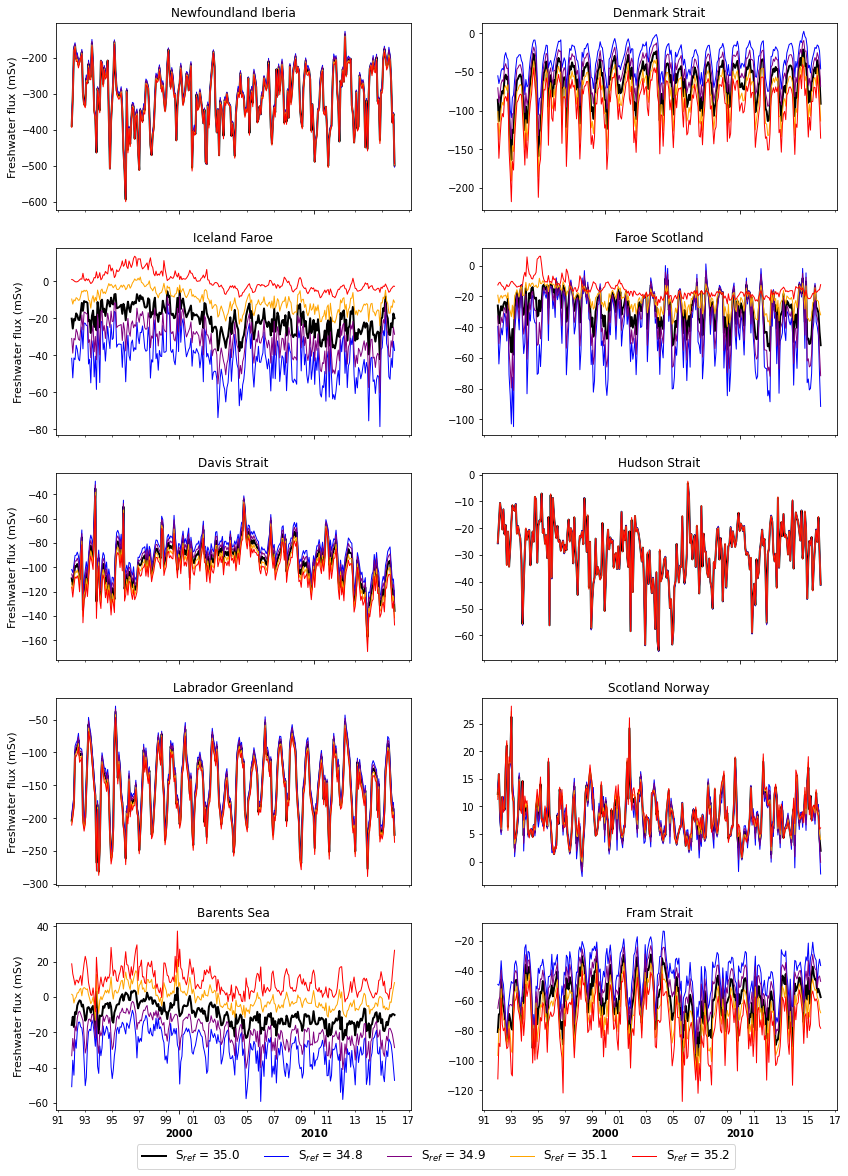

In [9]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(14, 20))

axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)

axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)

axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)

axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

#plt.savefig('/mnt/efs/figure.png')
plt.show()

In [10]:
flx = (flx - flx.mean('time'))/flx.std('time')

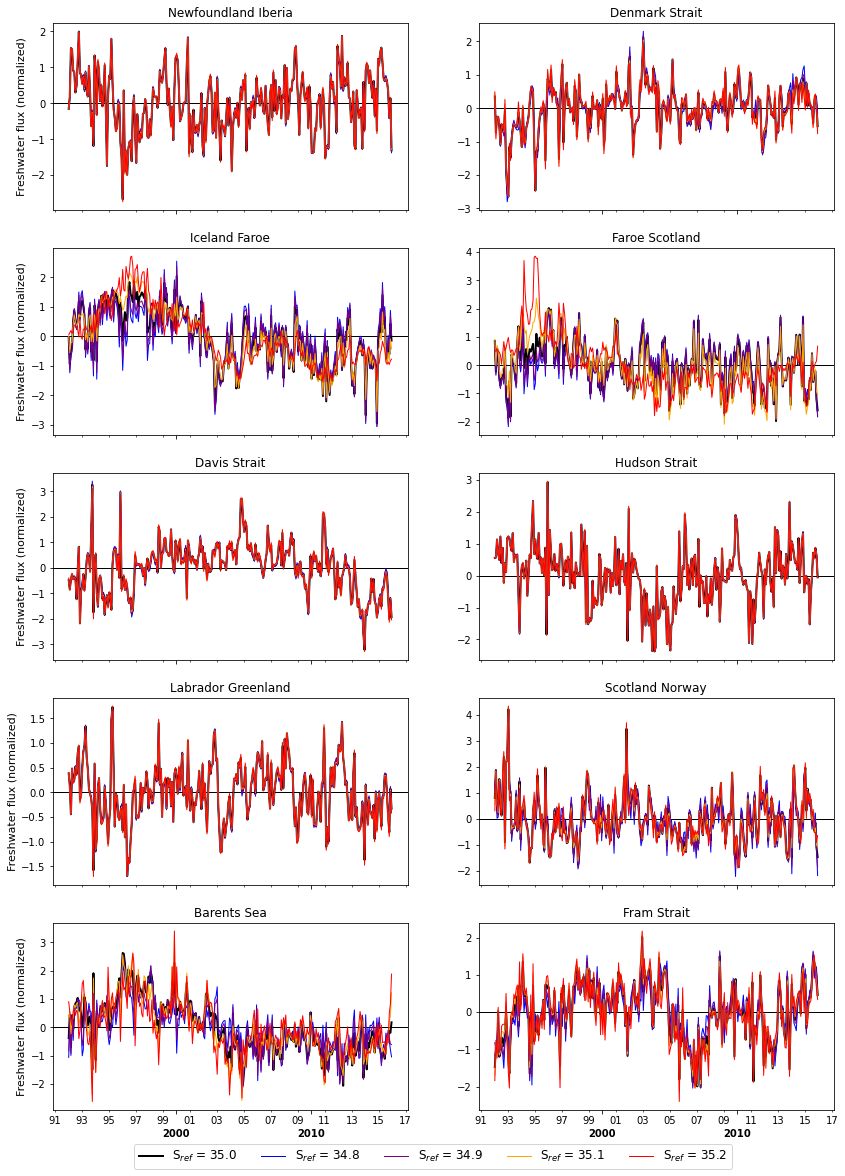

In [13]:
fig, axs = plt.subplots(5, 2,sharex=True, figsize=(14, 20))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel(r'Freshwater flux (normalized)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Freshwater flux (normalized)',fontsize=11)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Freshwater flux (normalized)',fontsize=11)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Freshwater flux (normalized)',fontsize=11)

axs[3,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Freshwater flux (normalized)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

plt.show()

In [14]:
flx = flx.groupby('time.month') - flx.groupby('time.month').mean('time')
#flx = flx.isel(time=slice(0, -1))

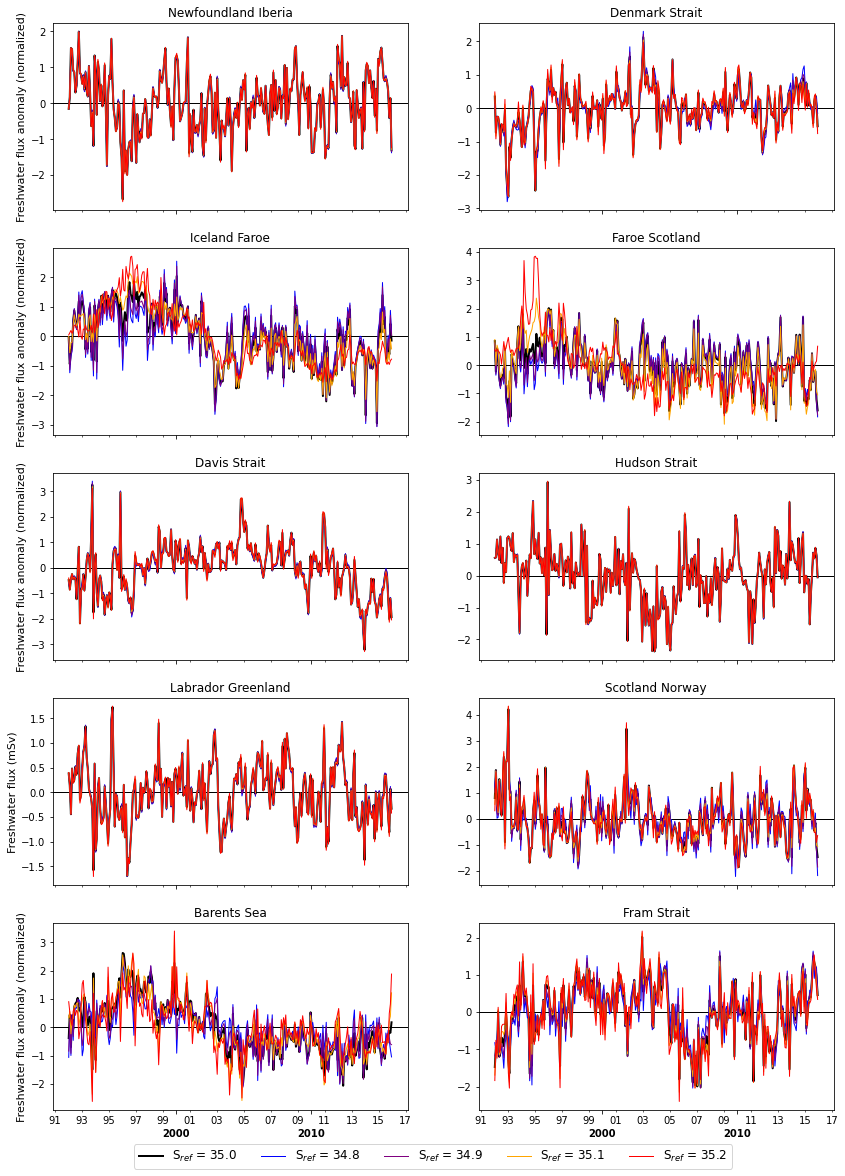

In [15]:
fig, axs = plt.subplots(5, 2,sharex=True, figsize=(14, 20))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel(r'Freshwater flux anomaly (normalized)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Freshwater flux anomaly (normalized)',fontsize=11)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Freshwater flux anomaly (normalized)',fontsize=11)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=11)

axs[3,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Freshwater flux anomaly (normalized)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

plt.show()

**Note: Reload datasets**

In [9]:
flx = flx.groupby('time.month') - flx.groupby('time.month').mean('time')

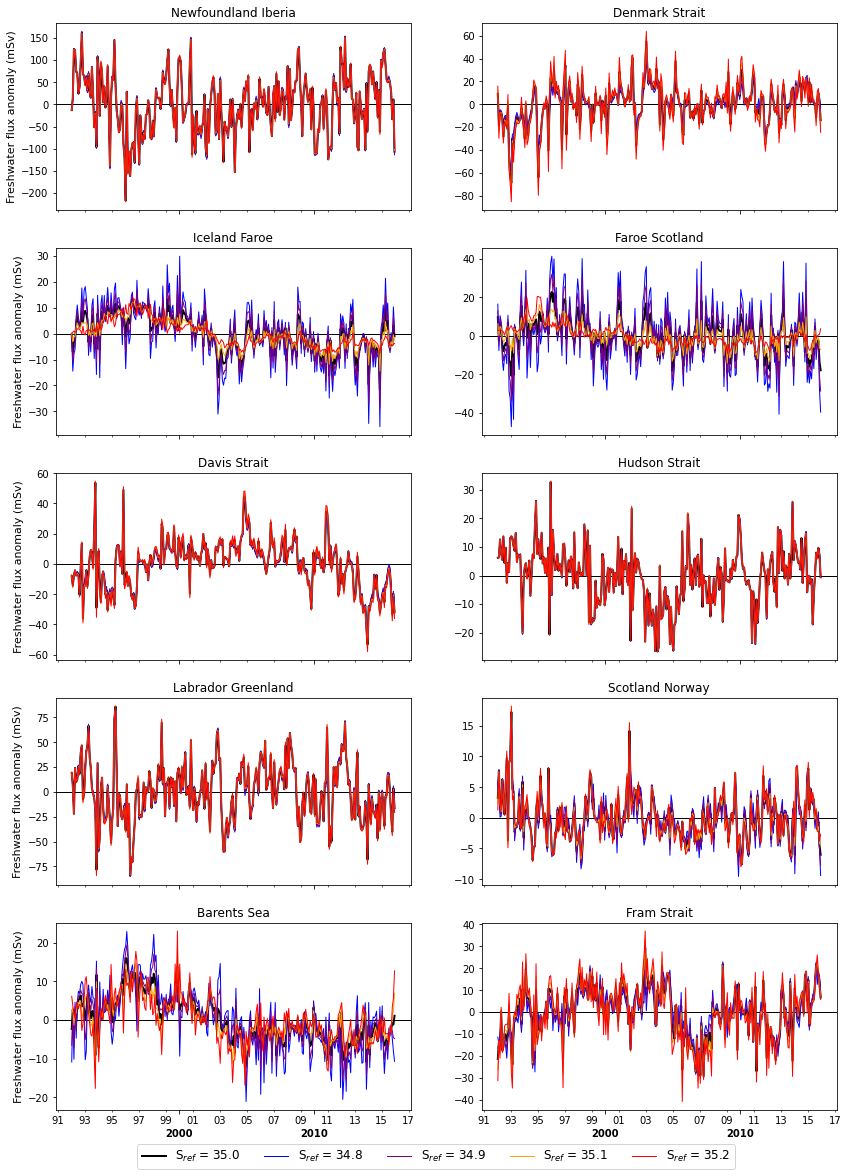

In [10]:
fig, axs = plt.subplots(5, 2,sharex=True, figsize=(14, 20))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel(r'Freshwater flux anomaly (mSv)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Freshwater flux anomaly (mSv)',fontsize=11)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Freshwater flux anomaly (mSv)',fontsize=11)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Freshwater flux anomaly (mSv)',fontsize=11)

axs[3,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Freshwater flux anomaly (mSv)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350*1e3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348*1e3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349*1e3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351*1e3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352*1e3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

plt.show()

In [10]:
#ecco = xr.open_zarr('/mnt/efs/data/ecco/zarr/eccov4r3_output/')
ecco = xr.open_zarr('/mnt/efs/data/ecco/eccov4r4_output/').sel(time=slice('1992-01-01','2015-12-31'))

In [11]:
flx = (flx.isel(time=slice(1, -1))*ecco.isel(time=slice(1, -1)).dt).cumsum(dim='time')
flx['time'] = ecco.time.isel(time=slice(1, -1))

In [12]:
flx = flx - flx.mean('time')

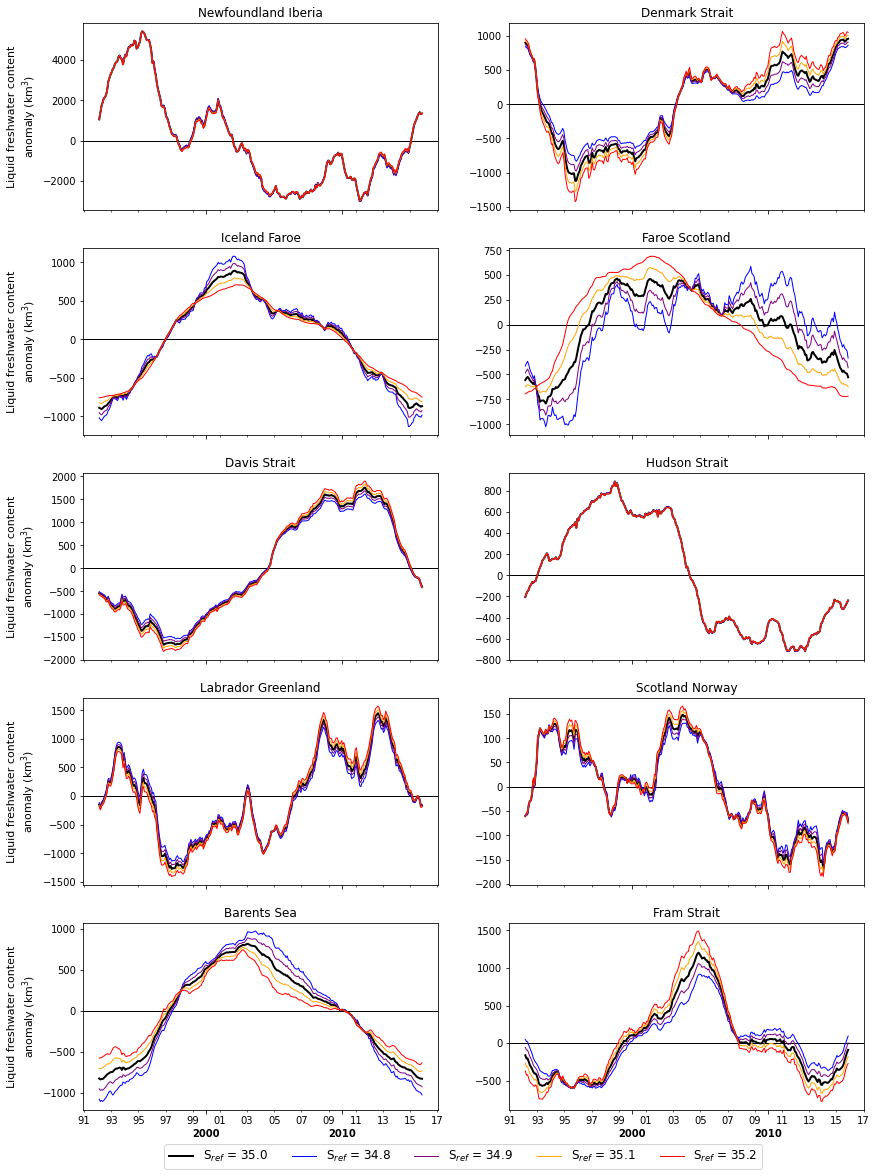

In [13]:
fig, axs = plt.subplots(5, 2,sharex=True, figsize=(14, 20))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel('Liquid freshwater content\nanomaly (km$^3$)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel('Liquid freshwater content\nanomaly (km$^3$)',fontsize=11)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel('Liquid freshwater content\nanomaly (km$^3$)',fontsize=11)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel('Liquid freshwater content\nanomaly (km$^3$)',fontsize=11)

axs[3,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel('Liquid freshwater content\nanomaly (km$^3$)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350*1e-3, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348*1e-3, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349*1e-3, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351*1e-3, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352*1e-3, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

plt.show()

### Normalize

In [15]:
flx = flx/flx.std('time')

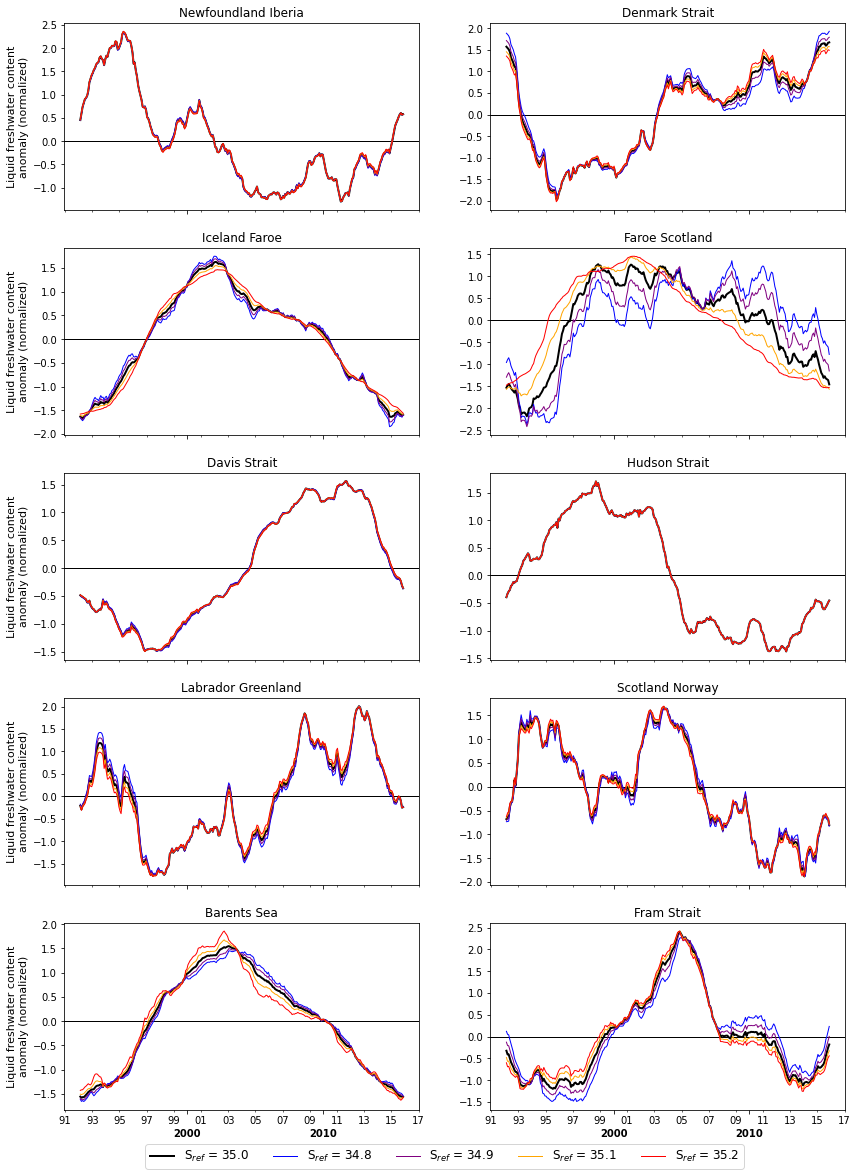

In [16]:
fig, axs = plt.subplots(5, 2,sharex=True, figsize=(14, 20))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,0].set_ylabel('Liquid freshwater content\nanomaly (normalized)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel('Liquid freshwater content\nanomaly (normalized)',fontsize=11)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel('Liquid freshwater content\nanomaly (normalized)',fontsize=11)

axs[2,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel('Liquid freshwater content\nanomaly (normalized)',fontsize=11)

axs[3,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel('Liquid freshwater content\nanomaly (normalized)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref350, lw=2, color='k',
              label=r'S$_{ref}$ = 35.0')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref348, lw=1, color='b',
              label=r'S$_{ref}$ = 34.8')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref349, lw=1, color='purple',
              label=r'S$_{ref}$ = 34.9')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref351, lw=1, color='orange',
              label=r'S$_{ref}$ = 35.1')
axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').fw_sref352, lw=1, color='r',
              label=r'S$_{ref}$ = 35.2')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
axs[4,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.73, -0.15), ncol=5, fontsize=12)
format_xaxis(axs[4,1])

plt.show()

In [14]:
flx = xr.open_dataset('/mnt/efs/data/ecco_section_transports_slt.nc')

In [15]:
flx

<xarray.Dataset>
Dimensions:  (section: 12, time: 288)
Coordinates:
    iter     (time) float64 ...
    dt       (time) float64 ...
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14T12:00:00
  * section  (section) object 'Davis Strait' ... 'Bering Strait'
Data variables:
    vol      (section, time) float64 ...
    salt     (section, time) float64 ...

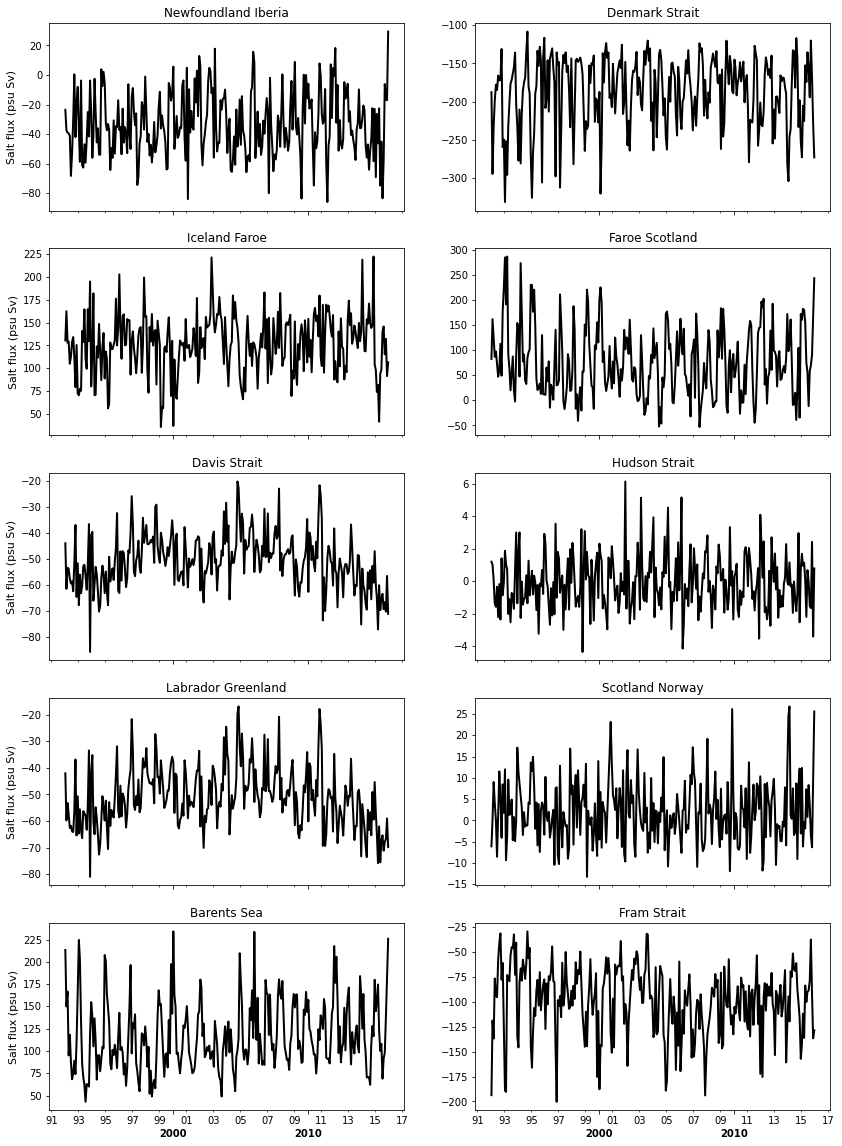

In [18]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(14, 20))

axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').salt, lw=2, color='k')
axs[0,0].set_ylabel(r'Salt flux (psu Sv)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').salt, lw=2, color='k')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').salt, lw=2, color='k')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Salt flux (psu Sv)',fontsize=11)

axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').salt, lw=2, color='k')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').salt, lw=2, color='k')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Salt flux (psu Sv)',fontsize=11)

axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').salt, lw=2, color='k')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').salt, lw=2, color='k')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Salt flux (psu Sv)',fontsize=11)

axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').salt, lw=2, color='k')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').salt, lw=2, color='k')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Salt flux (psu Sv)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').salt, lw=2, color='k')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
format_xaxis(axs[4,1])

#plt.savefig('/mnt/efs/figure.png')
plt.show()

In [19]:
flx = flx.groupby('time.month') - flx.groupby('time.month').mean('time')

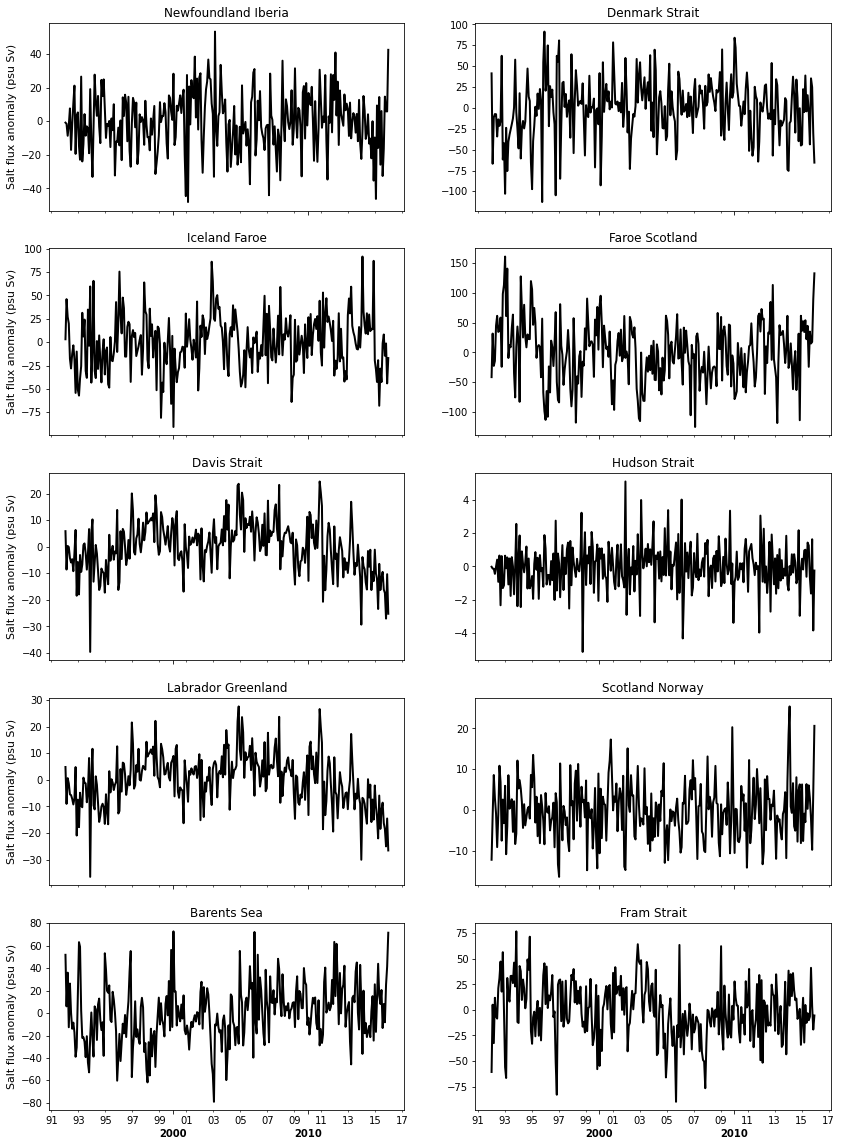

In [21]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(14, 20))

axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').salt, lw=2, color='k')
axs[0,0].set_ylabel(r'Salt flux anomaly (psu Sv)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').salt, lw=2, color='k')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').salt, lw=2, color='k')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Salt flux anomaly (psu Sv)',fontsize=11)

axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').salt, lw=2, color='k')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').salt, lw=2, color='k')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Salt flux anomaly (psu Sv)',fontsize=11)

axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').salt, lw=2, color='k')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').salt, lw=2, color='k')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Salt flux anomaly (psu Sv)',fontsize=11)

axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').salt, lw=2, color='k')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').salt, lw=2, color='k')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Salt flux anomaly (psu Sv)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').salt, lw=2, color='k')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
format_xaxis(axs[4,1])

plt.savefig('/mnt/efs/figure.png')
plt.show()

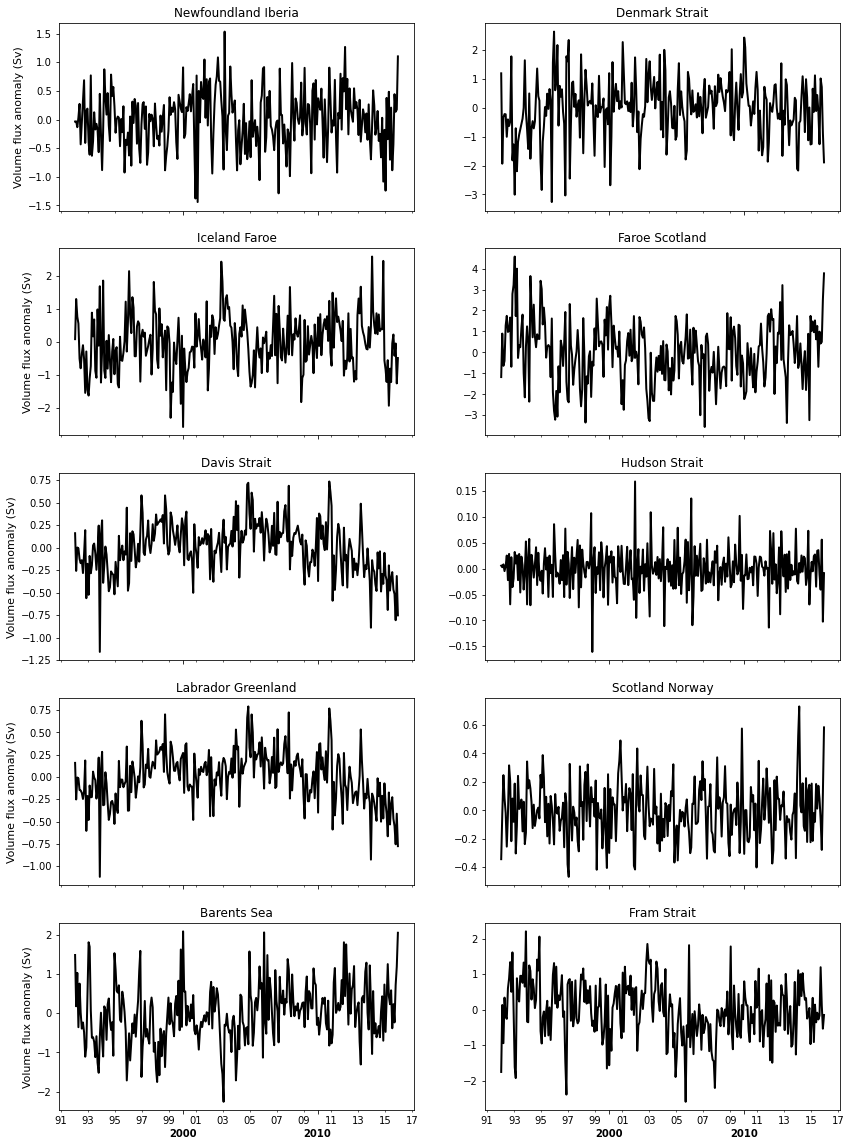

In [22]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(14, 20))

axs[0,0].plot(flx.time, flx.sel(section='Newfoundland Iberia').vol, lw=2, color='k')
axs[0,0].set_ylabel(r'Volume flux anomaly (Sv)',fontsize=11)
axs[0,0].set_title(r'Newfoundland Iberia', fontsize=12)

axs[0,1].plot(flx.time, flx.sel(section='Denmark Strait').vol, lw=2, color='k')
axs[0,1].set_title(r'Denmark Strait', fontsize=12)

axs[1,0].plot(flx.time, flx.sel(section='Iceland Faroe').vol, lw=2, color='k')
axs[1,0].set_title(r'Iceland Faroe', fontsize=12)
axs[1,0].set_ylabel(r'Volume flux anomaly (Sv)',fontsize=11)

axs[1,1].plot(flx.time, flx.sel(section='Faroe Scotland').vol, lw=2, color='k')
axs[1,1].set_title(r'Faroe Scotland', fontsize=12)

axs[2,0].plot(flx.time, flx.sel(section='Davis Strait').vol, lw=2, color='k')
axs[2,0].set_title(r'Davis Strait', fontsize=12)
axs[2,0].set_ylabel(r'Volume flux anomaly (Sv)',fontsize=11)

axs[2,1].plot(flx.time, flx.sel(section='Hudson Strait').vol, lw=2, color='k')
axs[2,1].set_title(r'Hudson Strait', fontsize=12)

axs[3,0].plot(flx.time, flx.sel(section='Labrador Greenland').vol, lw=2, color='k')
axs[3,0].set_title(r'Labrador Greenland', fontsize=12)
axs[3,0].set_ylabel(r'Volume flux anomaly (Sv)',fontsize=11)

axs[3,1].plot(flx.time, flx.sel(section='Scotland Norway').vol, lw=2, color='k')
axs[3,1].set_title(r'Scotland Norway', fontsize=12)

axs[4,0].plot(flx.time, flx.sel(section='Barents Sea').vol, lw=2, color='k')
axs[4,0].set_title(r'Barents Sea', fontsize=12)
axs[4,0].set_ylabel(r'Volume flux anomaly (Sv)',fontsize=11)
format_xaxis(axs[4,0])

axs[4,1].plot(flx.time, flx.sel(section='Fram Strait').vol, lw=2, color='k')
axs[4,1].set_title(r'Fram Strait', fontsize=12)
format_xaxis(axs[4,1])

plt.savefig('/mnt/efs/figure.png')
plt.show()